<a href="https://colab.research.google.com/github/reitezuz/notebooks-for-NES2-2024/blob/main/lecture_07/functional_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functional API
- examples of models with non-sequential architecture

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

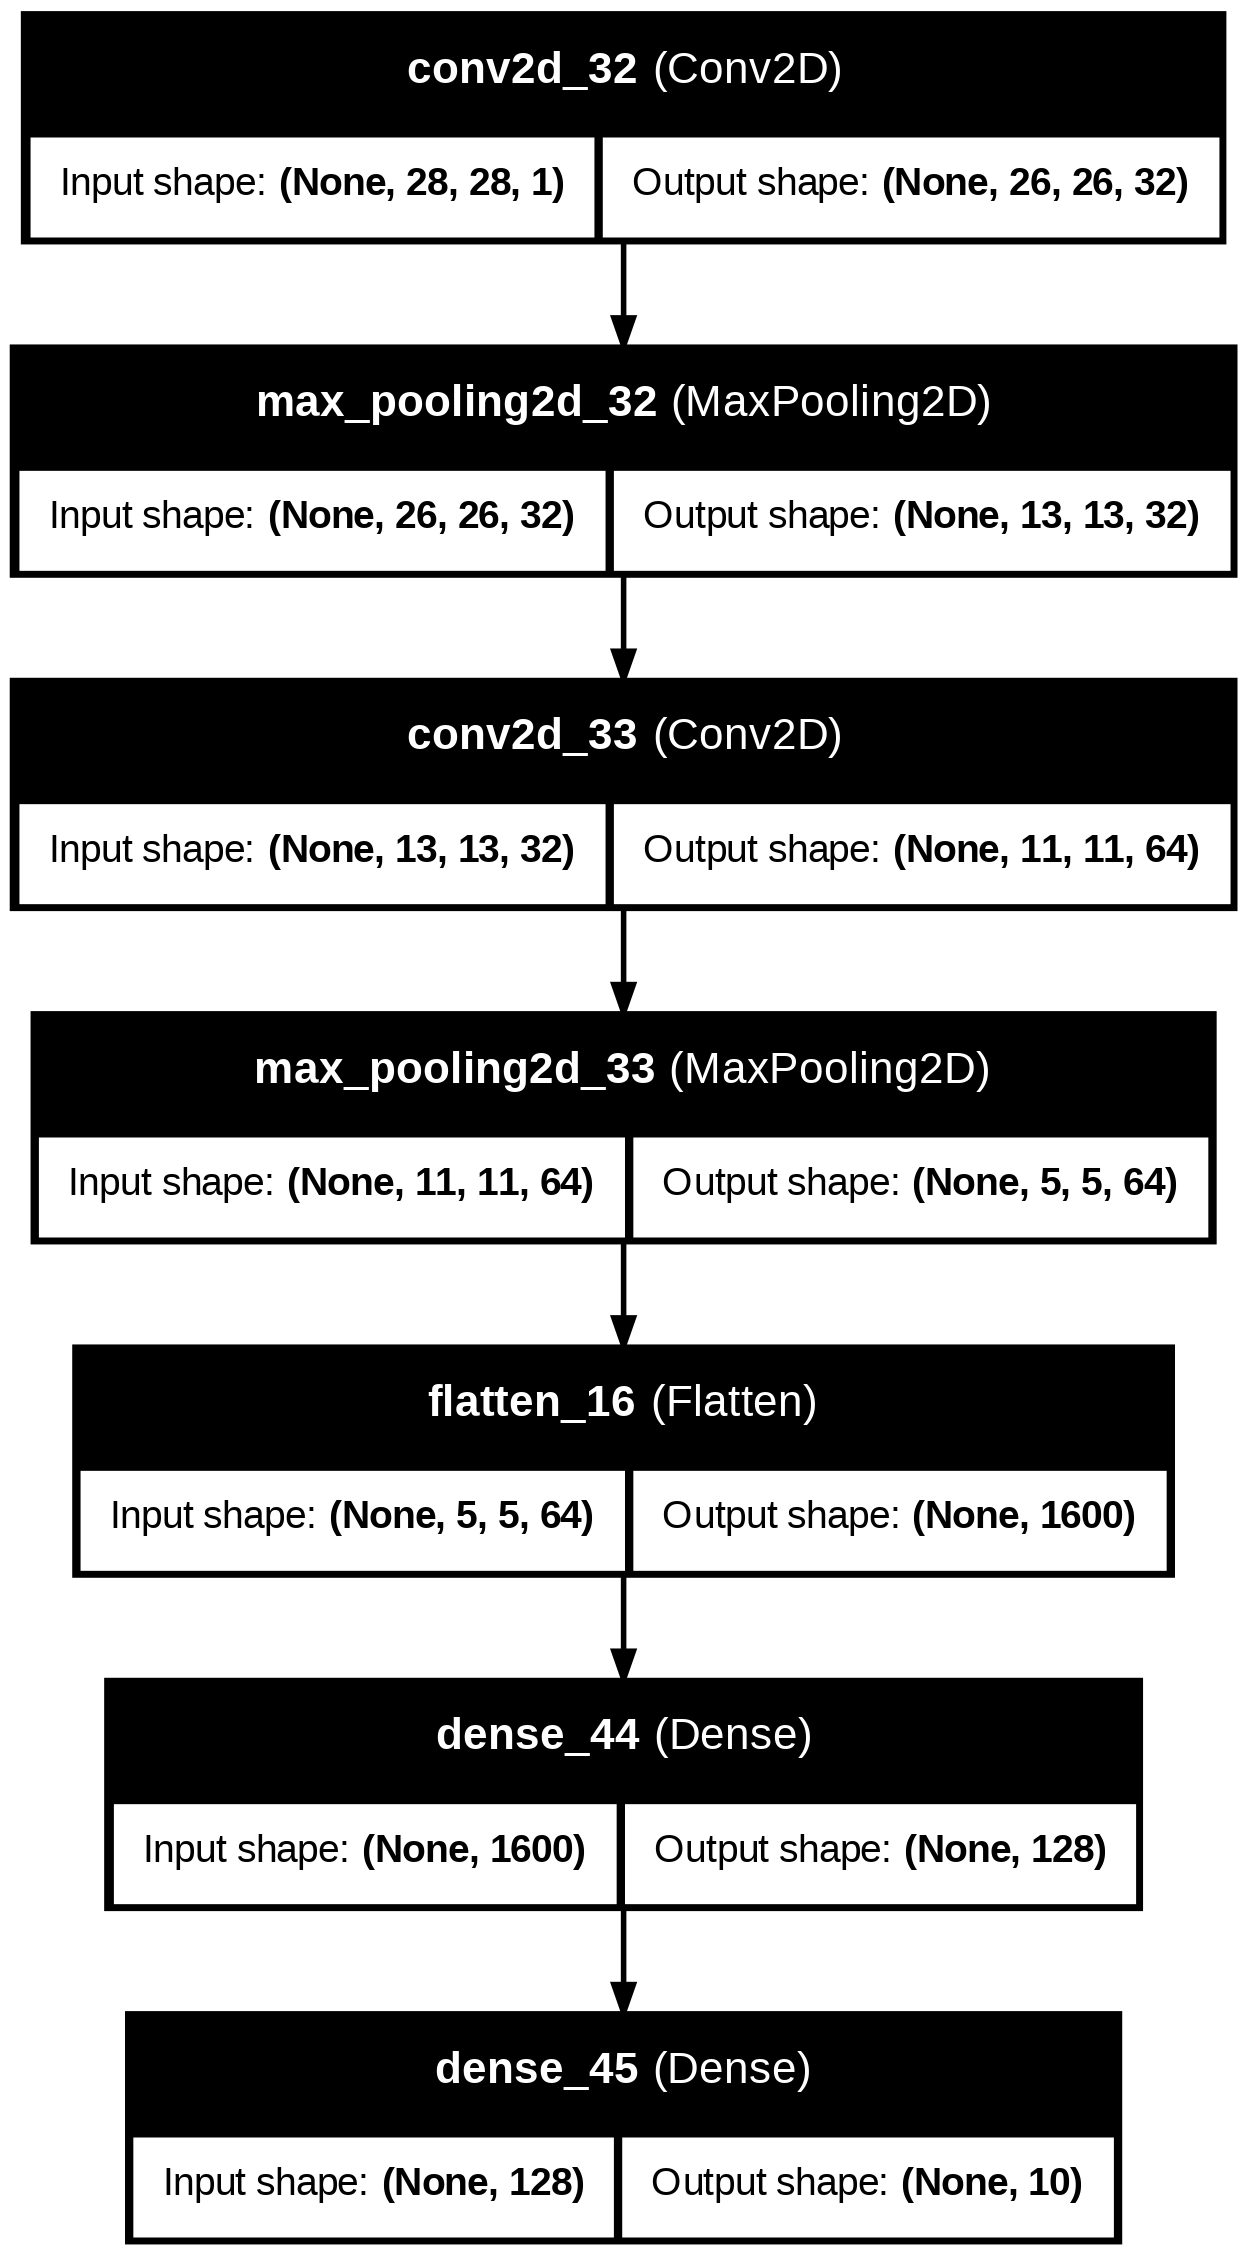

In [17]:
# Keras: sequential API
import keras
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

keras.utils.plot_model(model, to_file="sequential_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="sequential_model.png", width=400))

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

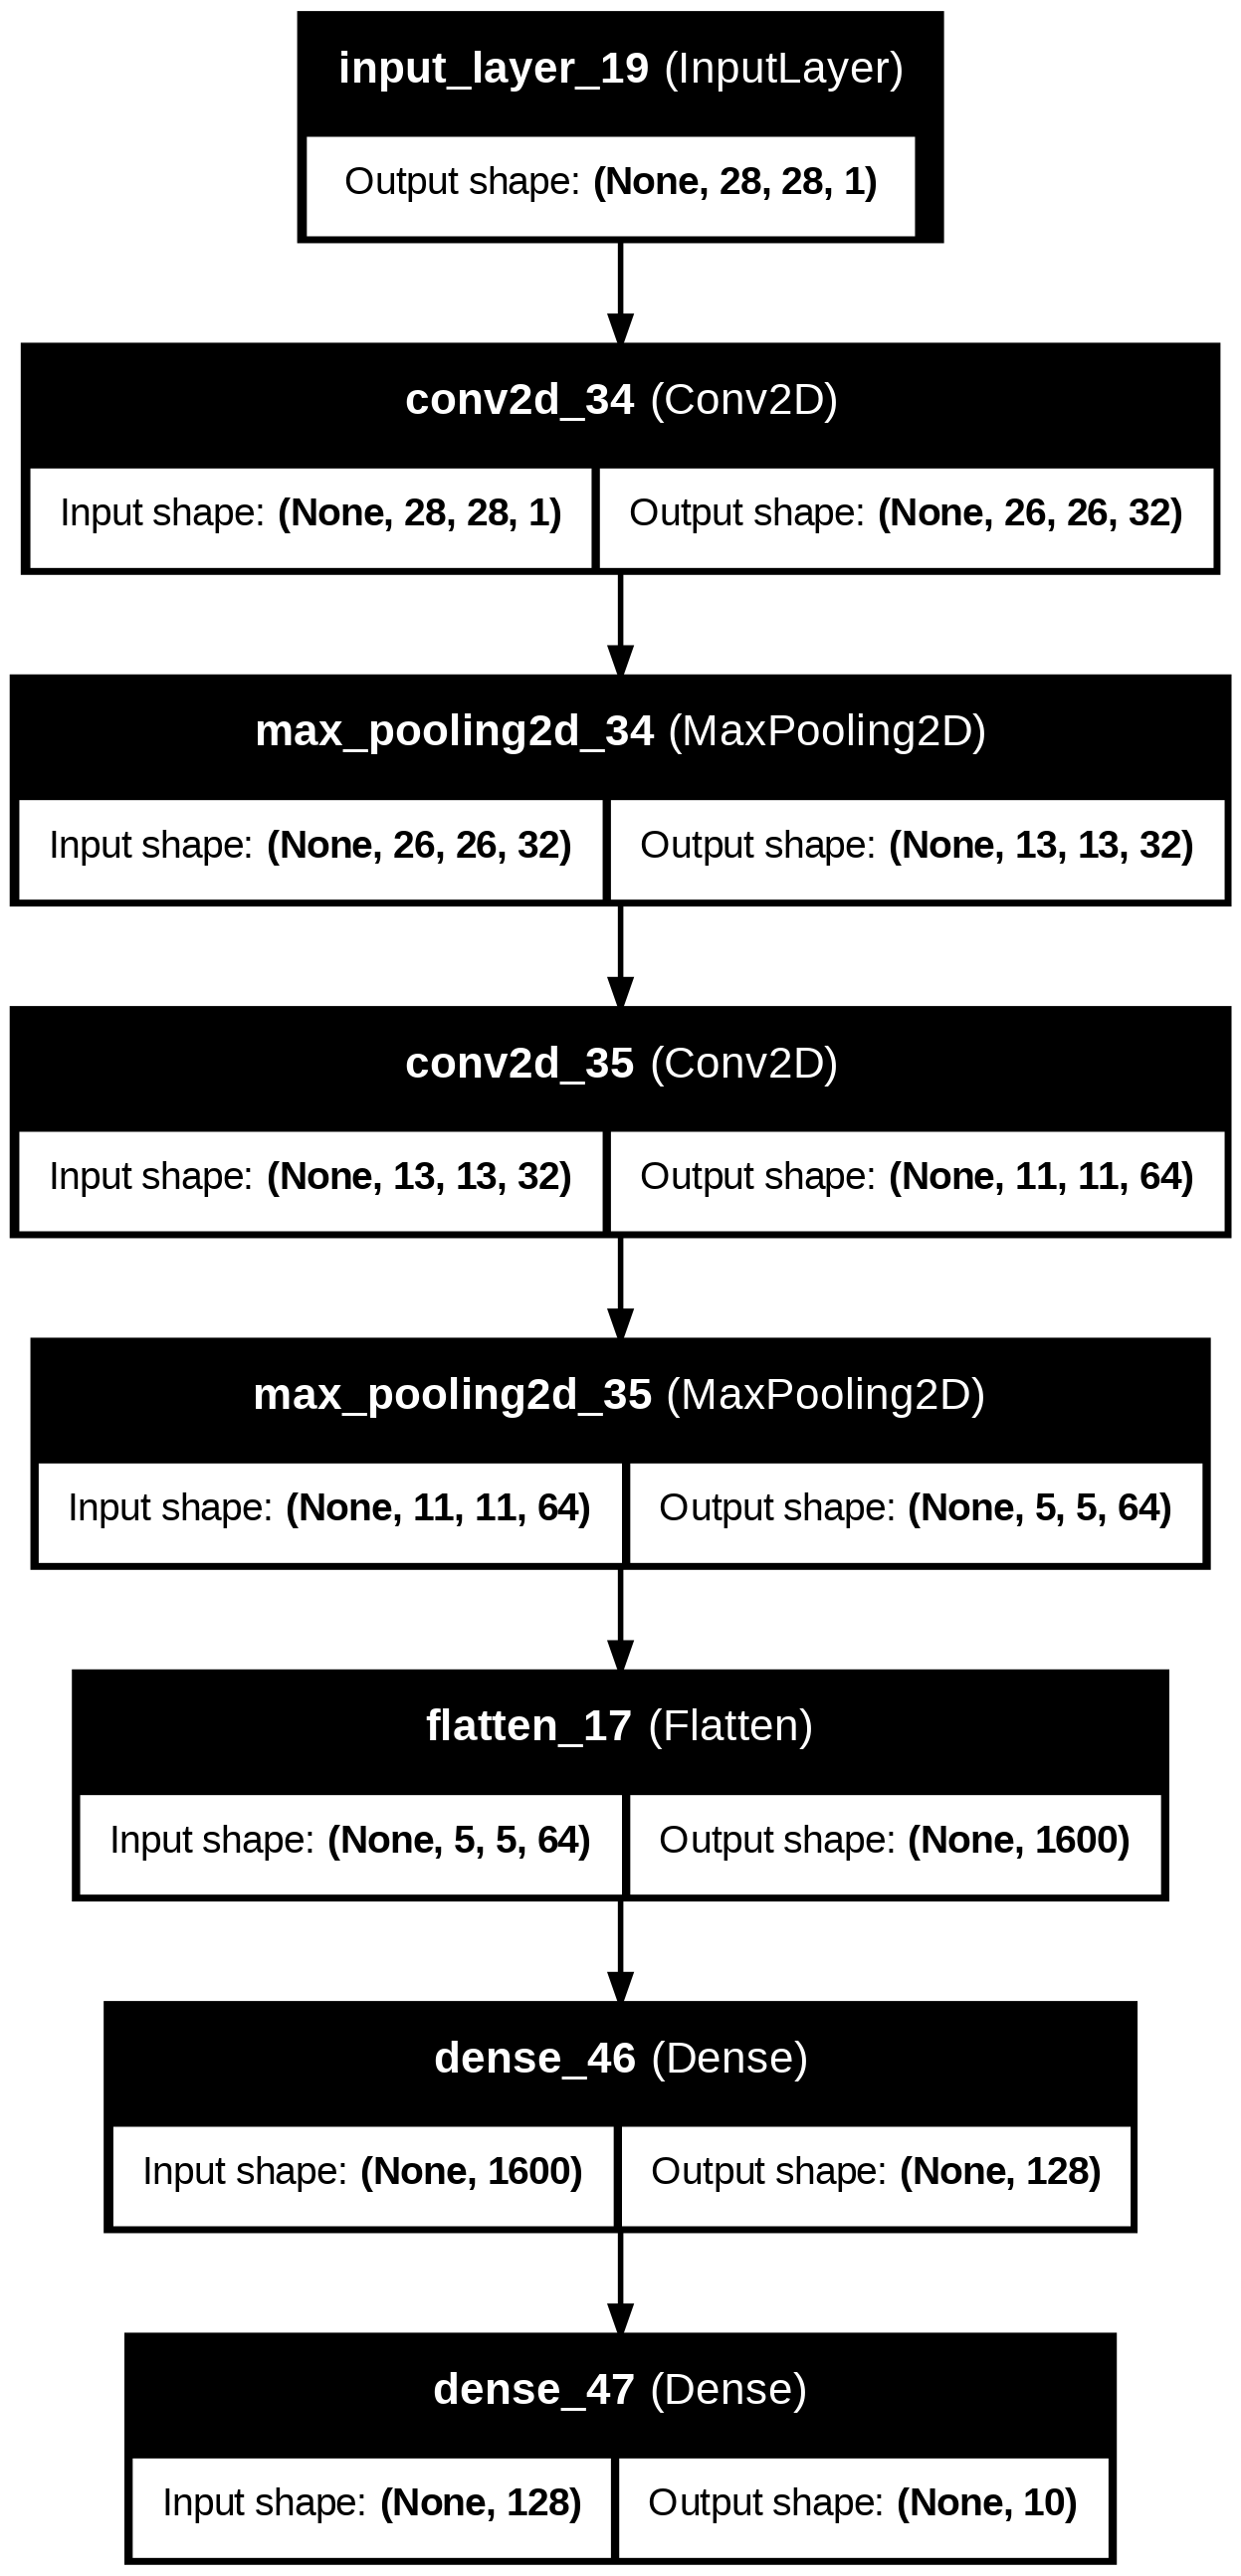

In [18]:
# Keras: functional API
import keras

# Define the input
inputs = keras.layers.Input(shape=(28, 28, 1))

# Define the model architecture
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(0.5)(x)  # Uncomment if you want dropout

outputs = keras.layers.Dense(10, activation='softmax')(x)

# Create the model
model = keras.models.Model(inputs=inputs, outputs=outputs)

# Display the model summary
model.summary()

keras.utils.plot_model(model, to_file="functional_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="functional_model.png", width=400))

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_26            │ (None, 64)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_72 (Dense)          │ (None, 32)             │          2,080 │ input_layer_26[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_74 (Dense)          │ (None, 64)             │          4,160 │ input_layer_26[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_73 (Dense)          │ (None, 16)             │            528 │ dense_72[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_75 (Dense)          │ (None, 32)             │          2,080 │ dense_74[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 48)             │              0 │ dense_73[0][0],        │
│ (Concatenate)             │                        │                │ dense_75[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_76 (Dense)          │ (None, 32)             │          1,568 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_77 (Dense)          │ (None, 1)              │             33 │ dense_76[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,449 (40.82 KB)

 Trainable params: 10,449 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

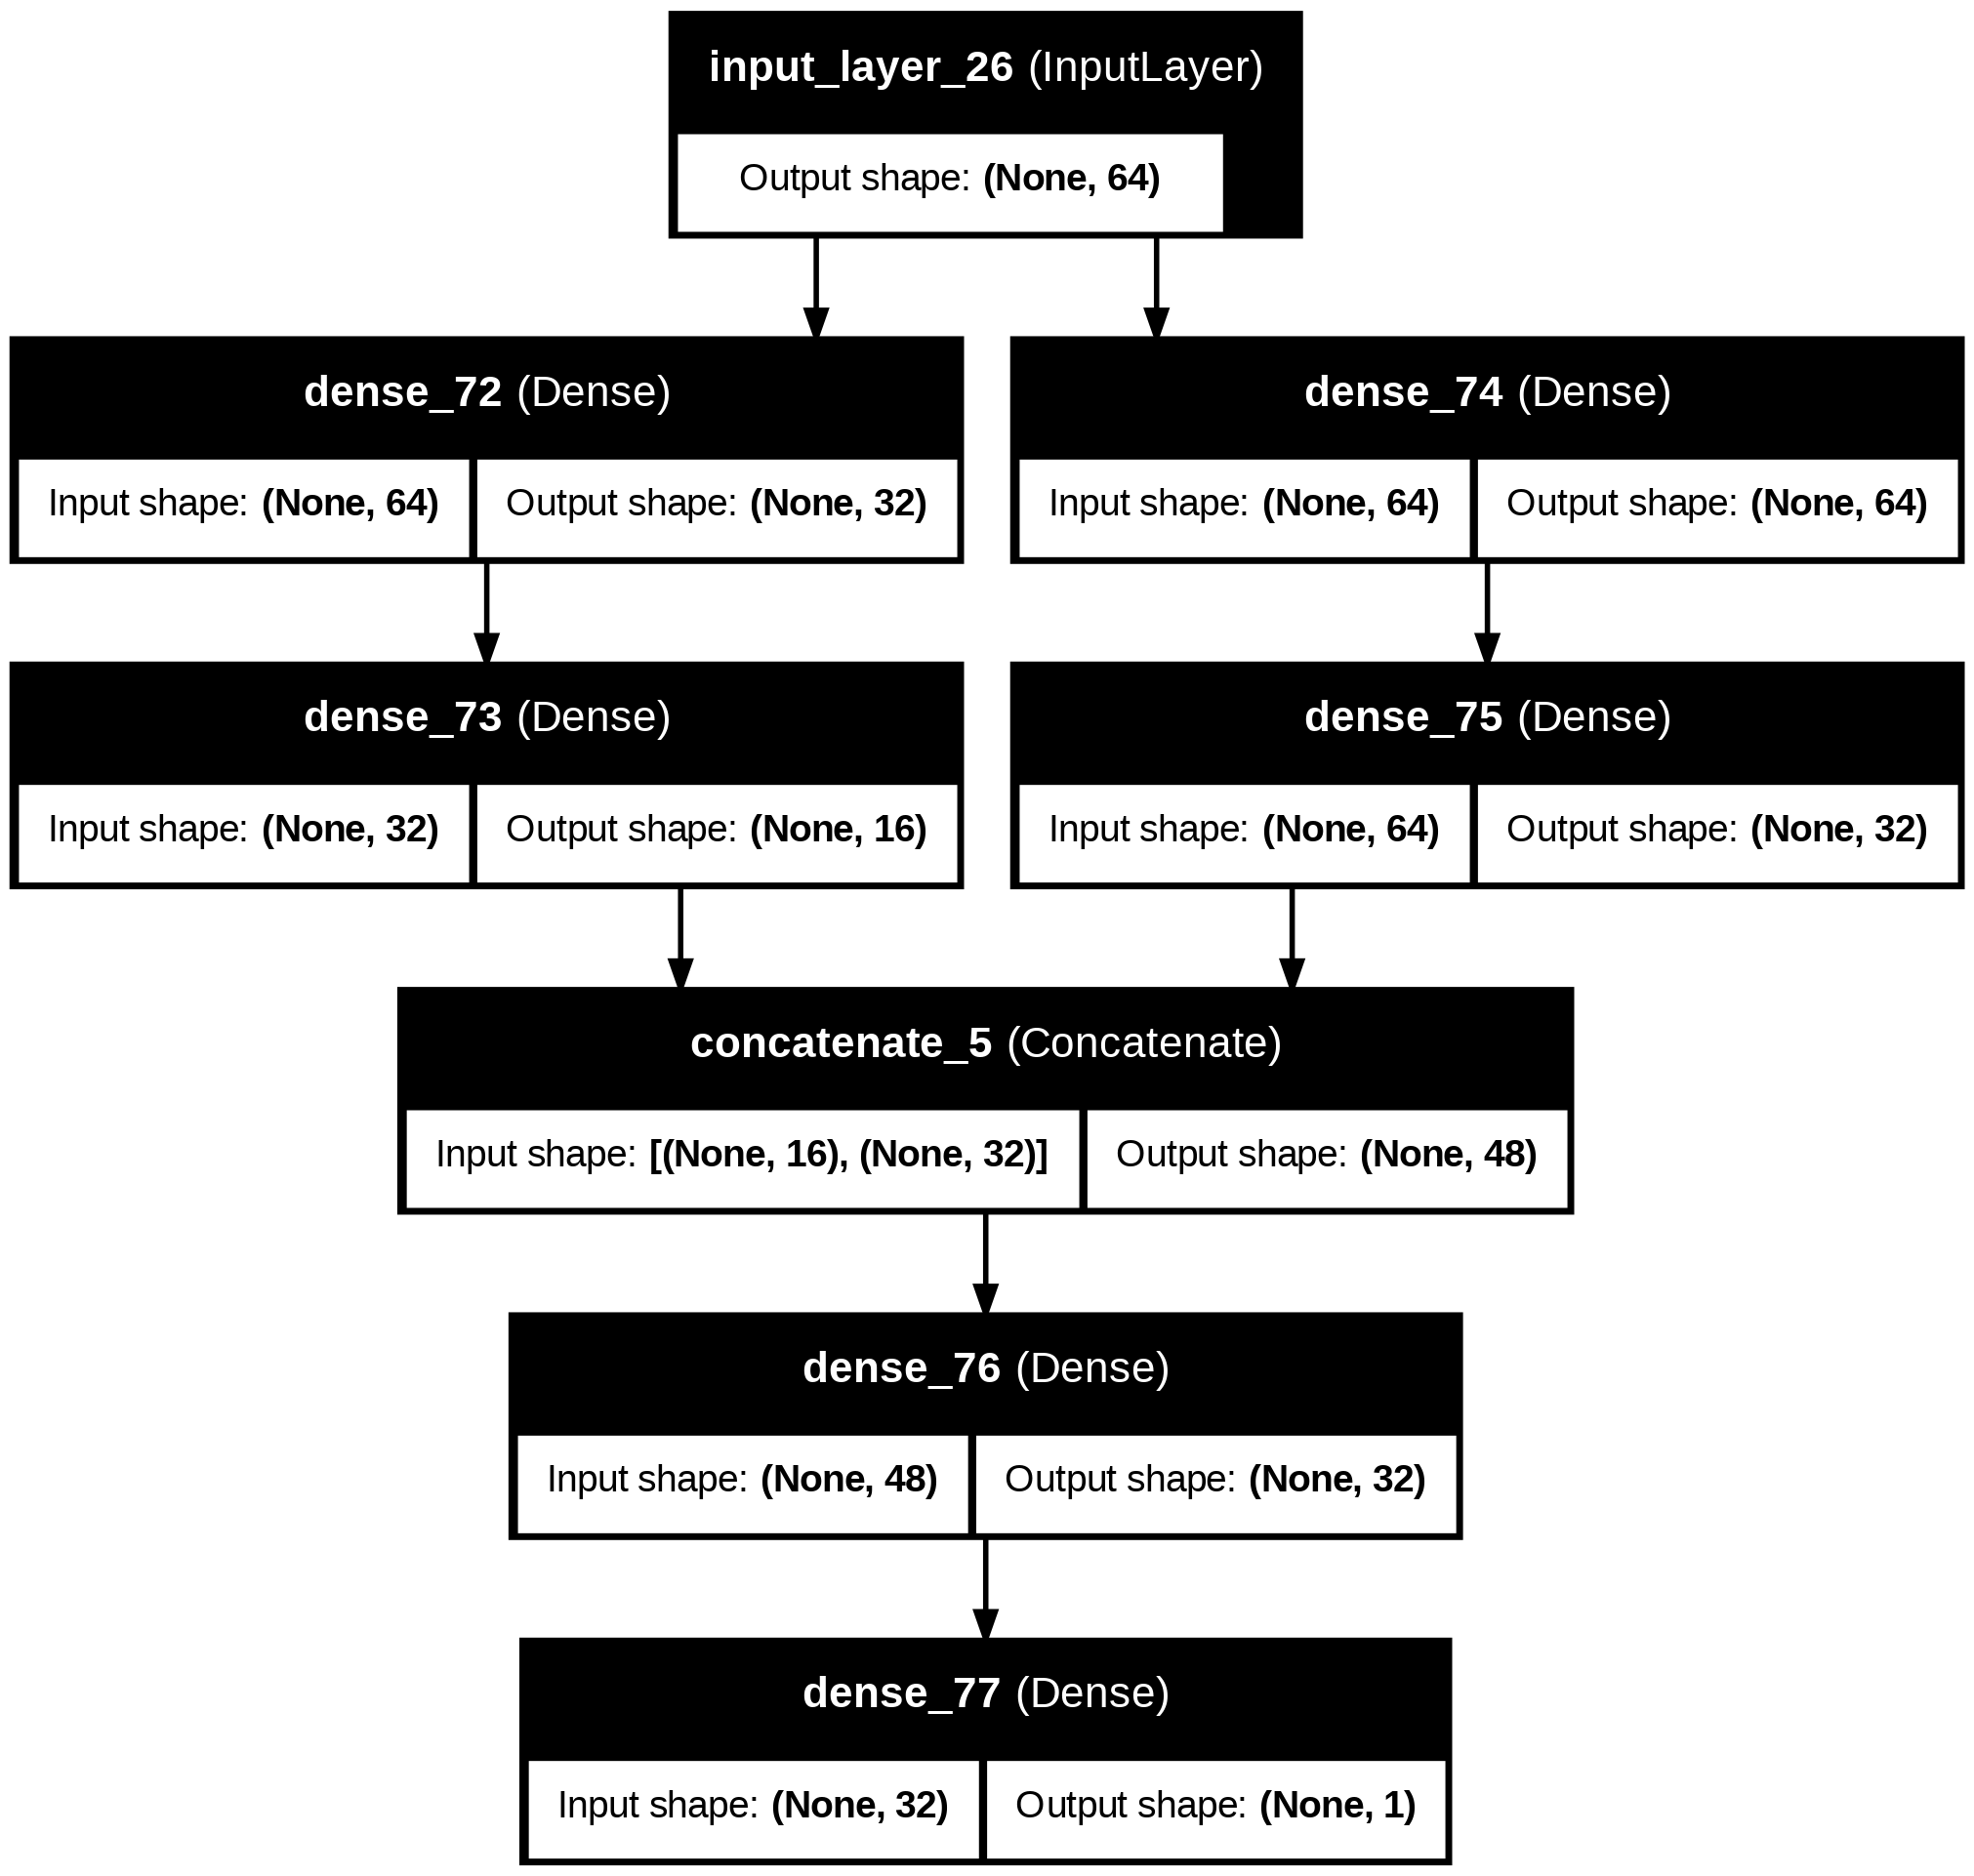

In [23]:
# Keras: branches
import keras

# Define the input layer
input_layer = keras.Input(shape=(64,))

# First branch
x1 = keras.layers.Dense(32, activation='relu')(input_layer)
x1 = keras.layers.Dense(16, activation='relu')(x1)

# Second branch
x2 = keras.layers.Dense(64, activation='relu')(input_layer)
x2 = keras.layers.Dense(32, activation='relu')(x2)

# Combine the branches by concatenating
combined = keras.layers.Concatenate()([x1, x2])

# Final dense layers on the combined input
x = keras.layers.Dense(32, activation='relu')(combined)
output_layer = keras.layers.Dense(1, activation='sigmoid')(x)  # Binary output example

# Create the model
model = keras.models.Model(inputs=input_layer, outputs=output_layer)

# Display the model summary
model.summary()
keras.utils.plot_model(model, to_file="branched_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="branched_model.png", width=700))

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_31            │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_34             │ (None, 10)             │        225,034 │ input_layer_31[0][0]   │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_35             │ (None, 10)             │        225,034 │ input_layer_31[0][0]   │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_36             │ (None, 10)             │        225,034 │ input_layer_31[0][0]   │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_3 (Average)       │ (None, 10)             │              0 │ functional_34[0][0],   │
│                           │                        │                │ functional_35[0][0],   │
│                           │                        │                │ functional_36[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 675,102 (2.58 MB)

 Trainable params: 675,102 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

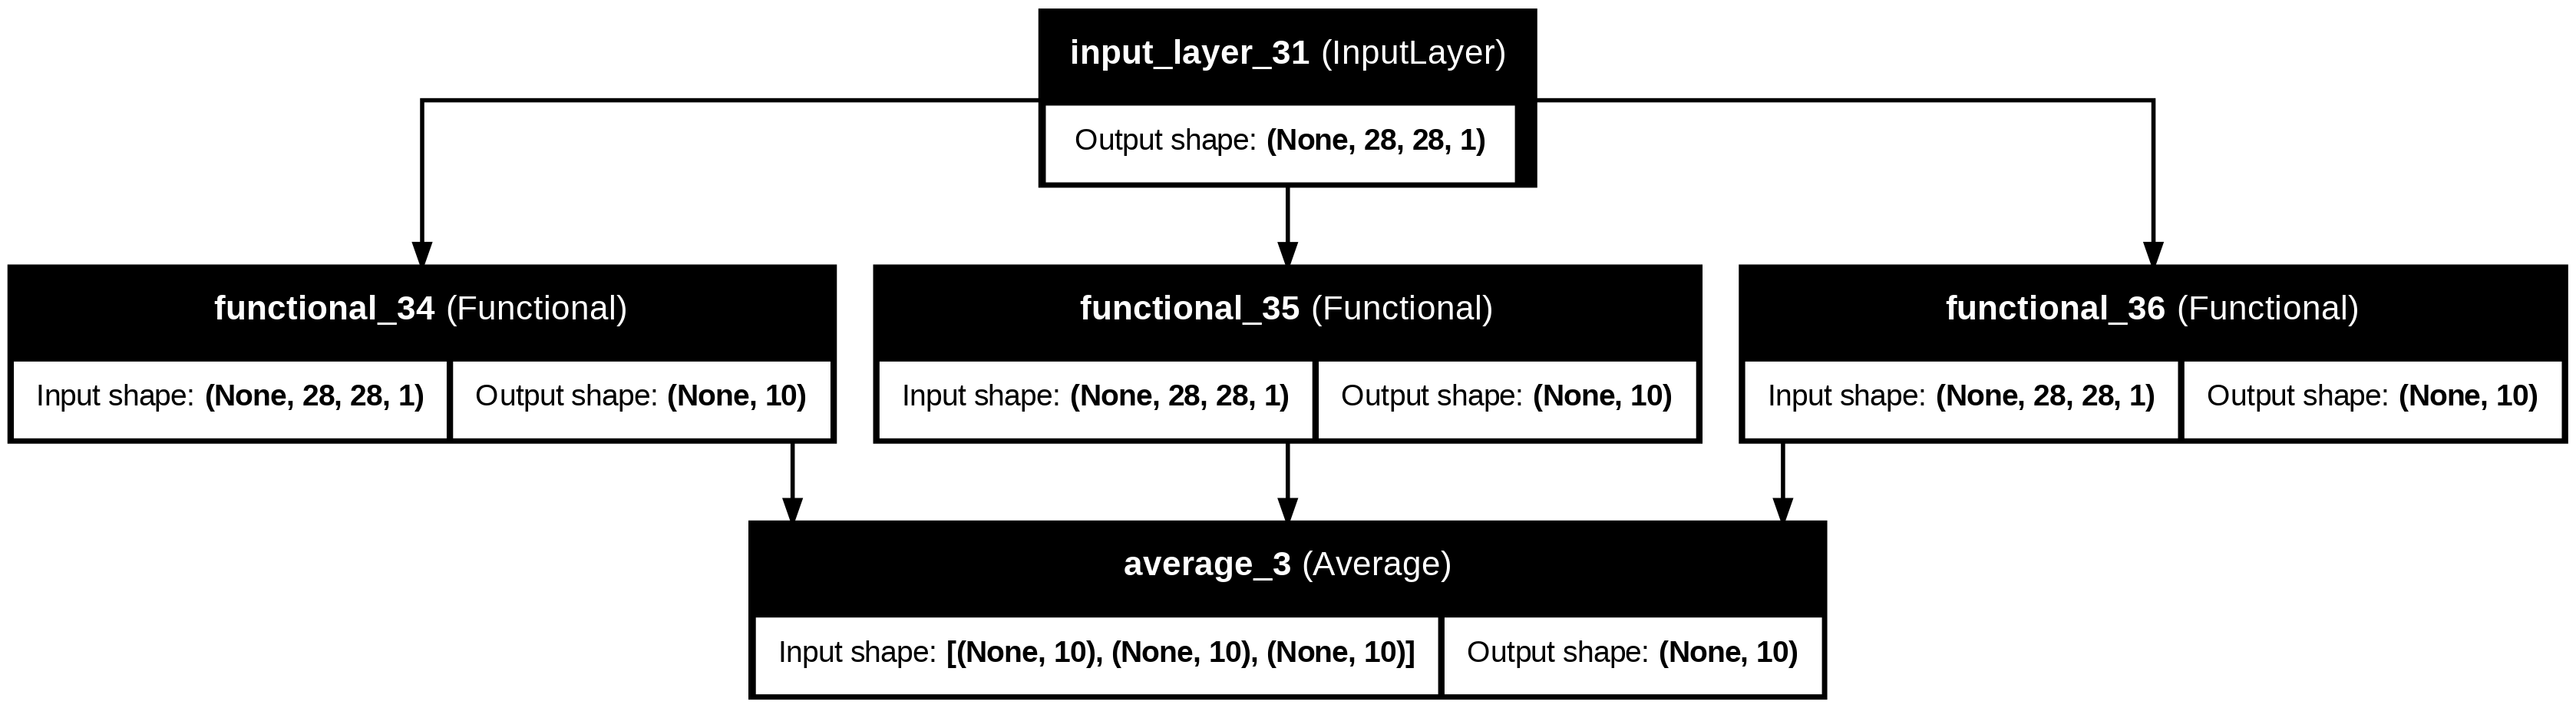

In [26]:
# CNN ensemble model
import keras
def create_cnn_model(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    outputs = keras.layers.Dense(10, activation='softmax')(x)
    model = keras.models.Model(inputs=inputs, outputs=outputs)
    return model

# Input layer
input_shape = (28, 28, 1)
input_layer = keras.Input(shape=input_shape)

# More CNN models
cnn_1 = create_cnn_model(input_shape)
cnn_2 = create_cnn_model(input_shape)
cnn_3 = create_cnn_model(input_shape)

# Submodels:
output_1 = cnn_1(input_layer)
output_2 = cnn_2(input_layer)
output_3 = cnn_3(input_layer)

# average the outputs
averaged_output = keras.layers.Average()([output_1, output_2, output_3])

# final model
model = keras.models.Model(inputs=input_layer, outputs=averaged_output)

model.summary()

keras.utils.plot_model(model, to_file="ensemble_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="ensemble_model.png", width=800))

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer)       │ (None, 64)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input2 (InputLayer)       │ (None, 32)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_84 (Dense)          │ (None, 32)             │          2,080 │ input1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_86 (Dense)          │ (None, 16)             │            528 │ input2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_85 (Dense)          │ (None, 16)             │            528 │ dense_84[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_87 (Dense)          │ (None, 8)              │            136 │ dense_86[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_6             │ (None, 24)             │              0 │ dense_85[0][0],        │
│ (Concatenate)             │                        │                │ dense_87[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_88 (Dense)          │ (None, 64)             │          1,600 │ concatenate_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_89 (Dense)          │ (None, 32)             │          2,080 │ dense_88[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output1 (Dense)           │ (None, 1)              │             33 │ dense_89[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output2 (Dense)           │ (None, 10)             │            330 │ dense_89[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,315 (28.57 KB)

 Trainable params: 7,315 (28.57 KB)

 Non-trainable params: 0 (0.00 B)

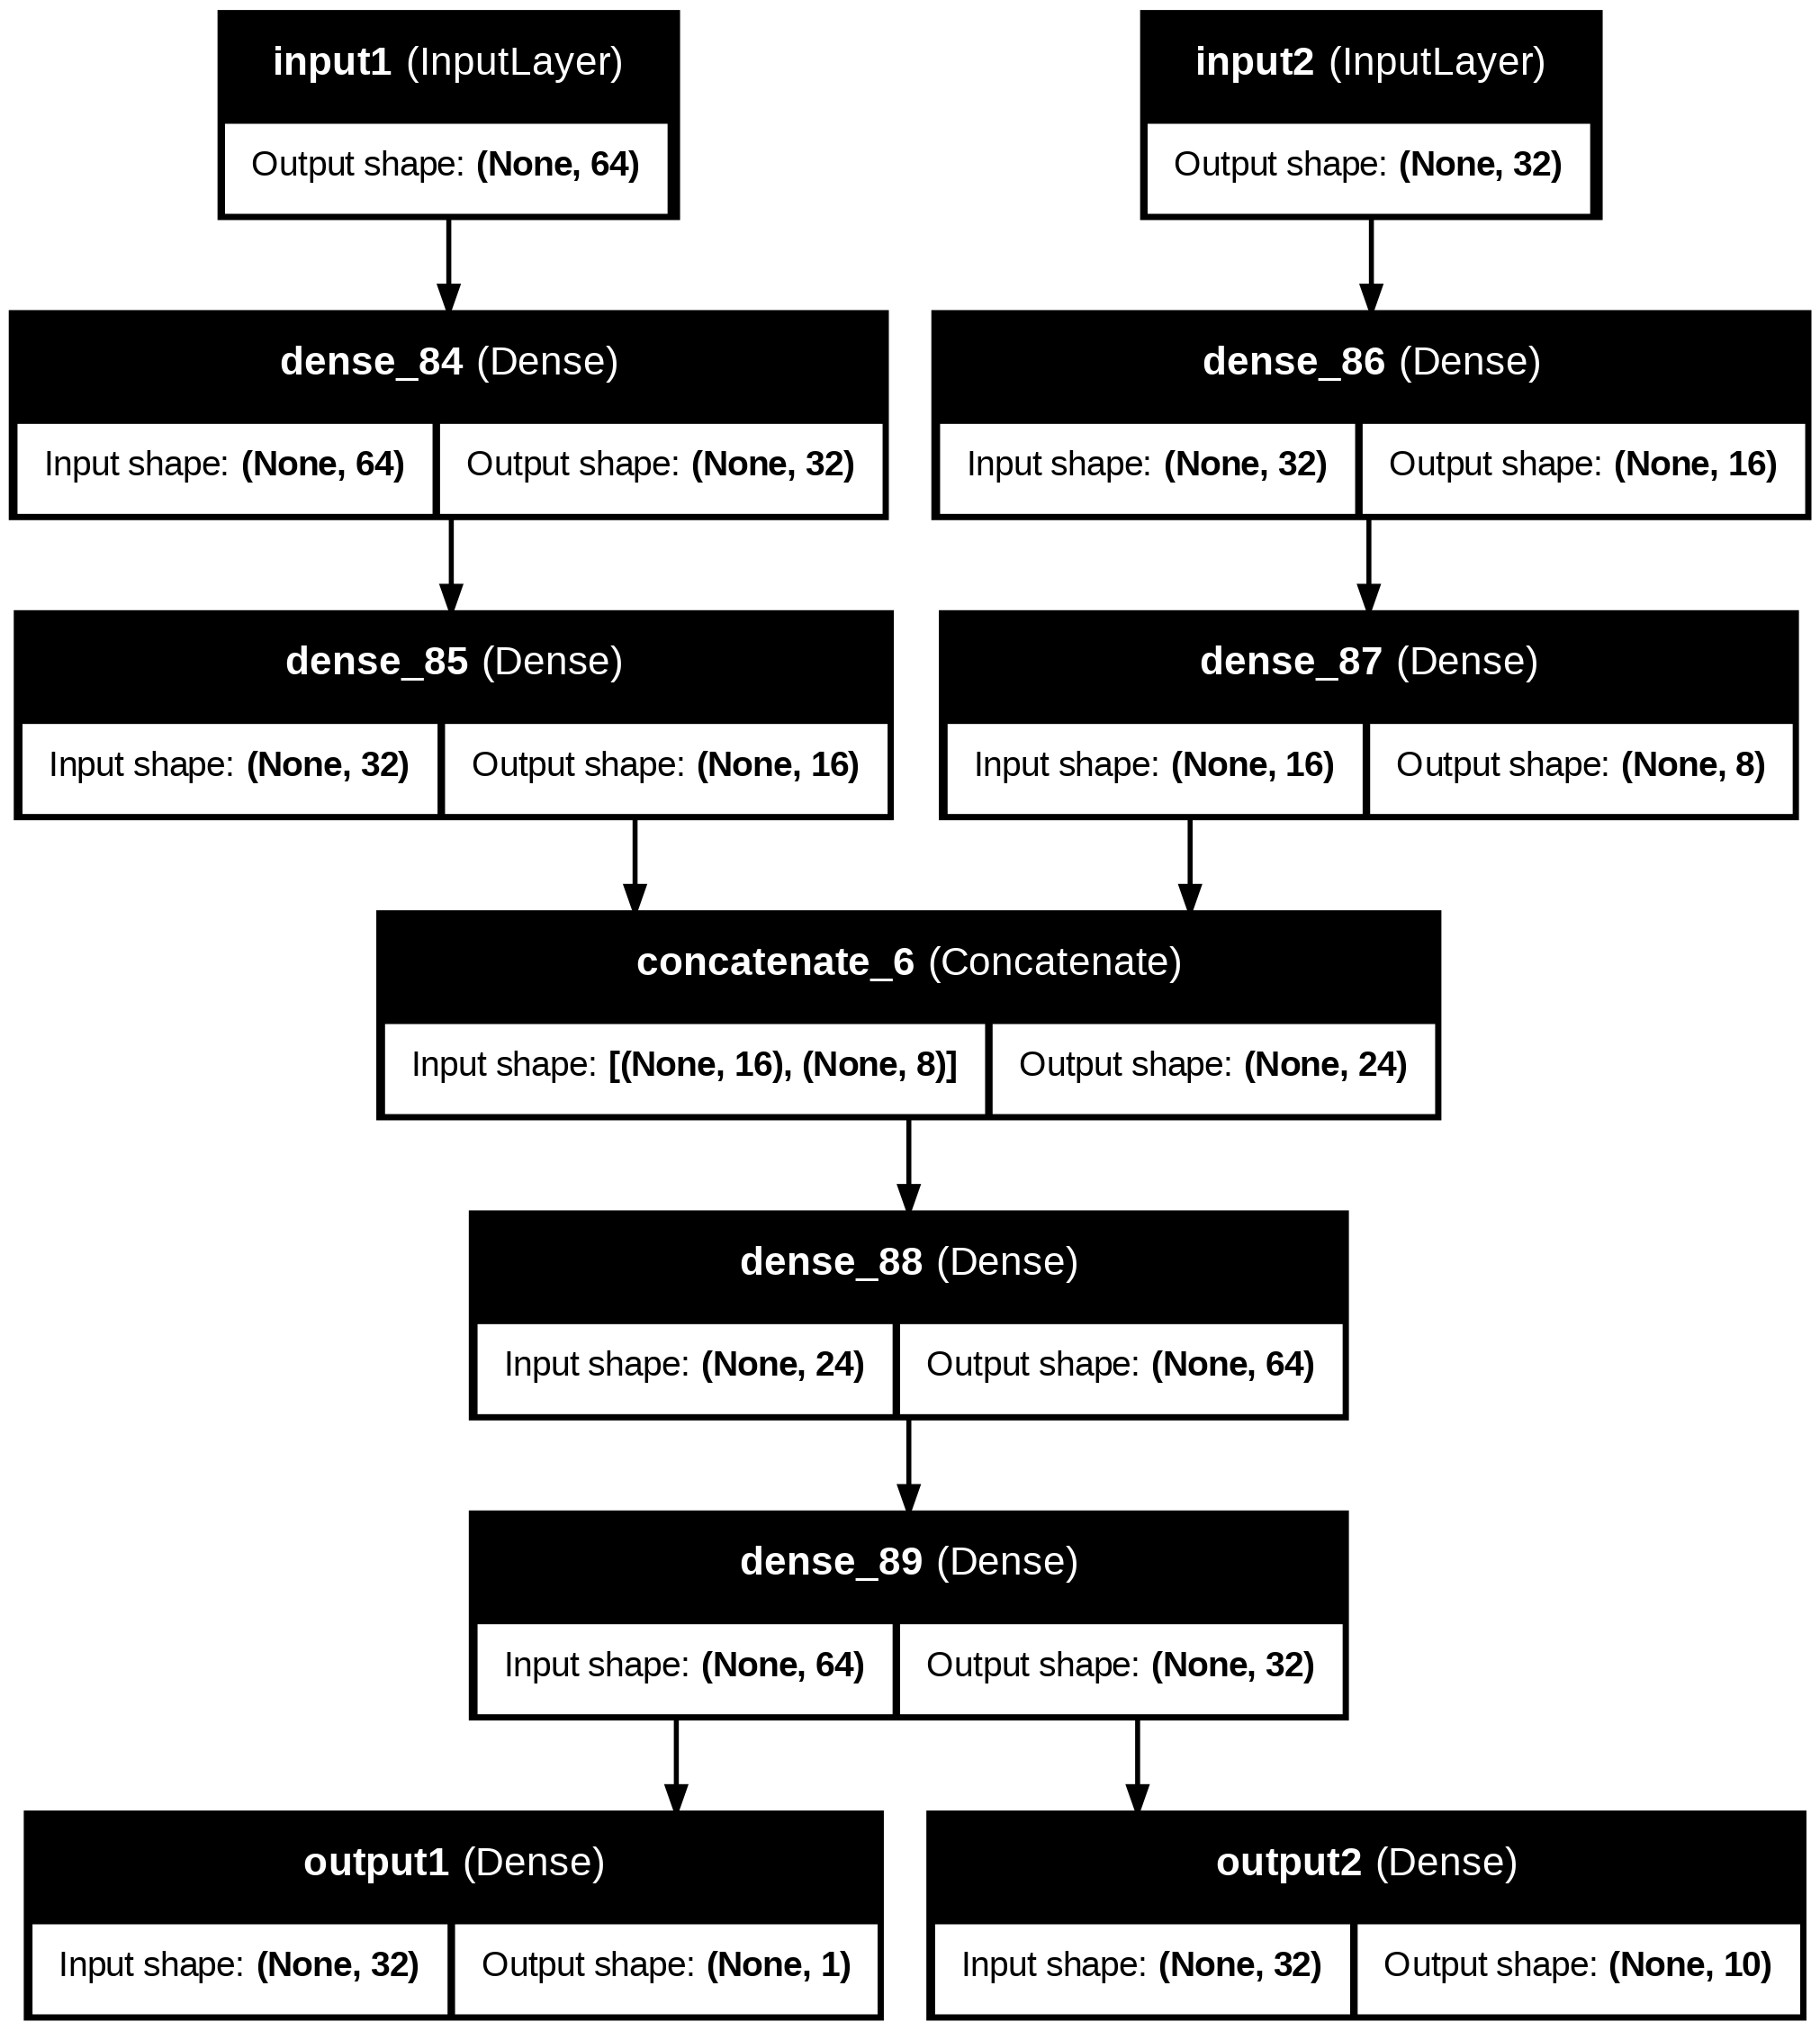

In [25]:
import keras
from keras import layers, models, Input

# Define the first input branch
input1 = Input(shape=(64,), name="input1")
x1 = layers.Dense(32, activation='relu')(input1)
x1 = layers.Dense(16, activation='relu')(x1)

# Define the second input branch
input2 = Input(shape=(32,), name="input2")
x2 = layers.Dense(16, activation='relu')(input2)
x2 = layers.Dense(8, activation='relu')(x2)

# Combine the branches by concatenating
combined = layers.Concatenate()([x1, x2])

# Shared dense layers after concatenation
shared = layers.Dense(64, activation='relu')(combined)
shared = layers.Dense(32, activation='relu')(shared)

# First output branch
output1 = layers.Dense(1, activation='sigmoid', name="output1")(shared)

# Second output branch
output2 = layers.Dense(10, activation='softmax', name="output2")(shared)

# Create the model with two inputs and two outputs
model = models.Model(inputs=[input1, input2], outputs=[output1, output2])

# Display the model summary
model.summary()

# Visualize the model structure
keras.utils.plot_model(model, to_file="multi_input_output_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="multi_input_output_model.png", width=700))
